<a href="https://colab.research.google.com/github/GENTLEW1ND/Python/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [21]:
# Loading the csv data to a Pandas dataframe
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [22]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
# print the last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [24]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [25]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [26]:
# checking the number of missing values
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [27]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation
2. Negative Correlation

In [34]:
correlation = gold_data.drop(['Date'],axis=1).corr()

<Axes: >

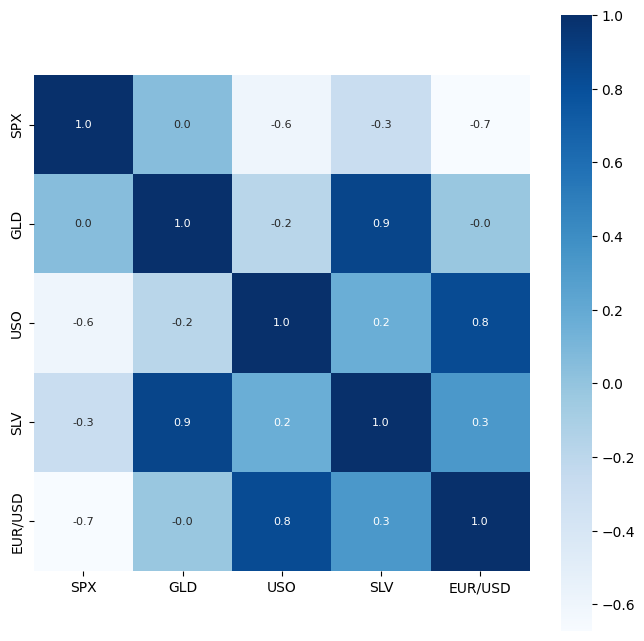

In [35]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

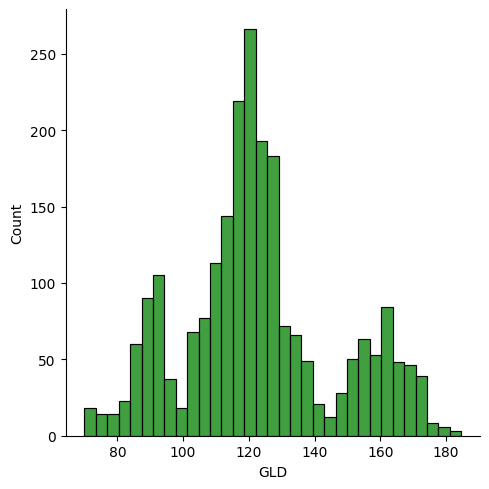

In [10]:
#checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [40]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


Splitting into Training Data and Test Data.

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=2,test_size=0.2)

Model Training:

Random Forest Regressor

In [42]:
regressor = RandomForestRegressor(n_estimators=100)

In [43]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [44]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [45]:
print(test_data_prediction)

[168.61969943  81.68760002 116.06380003 127.54620113 120.92400108
 154.91929776 150.1095985  126.13220006 117.62169864 126.05350083
 116.76200118 172.52280087 141.22479879 168.04739924 115.21729982
 117.32070067 136.60610351 170.22150078 159.4401022  161.32449928
 155.18909981 125.3133003  175.7951995  157.26010347 125.19480049
  93.71810004  77.30150017 120.63460032 119.12169922 167.48499983
  88.09560065 125.30460029  91.23400095 117.61829992 121.1038996
 136.21240183 115.25300123 114.86330069 147.87759978 107.17470134
 104.68360248  87.08369795 126.51070051 118.03789971 153.63099902
 119.66889967 108.54419939 108.09269887  93.33200072 127.22209757
  75.4123002  113.71419937 121.45249991 111.33549903 118.89809901
 120.82549883 158.6604     168.01490158 147.01209699  85.94899866
  94.40090024  86.80299897  90.56070001 119.03620036 126.34900078
 127.64859992 169.34340018 122.32379919 117.41899881  98.47380018
 168.22270101 143.16519858 131.97800247 121.16920201 121.07659951
 119.563900

In [47]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.989792960974526


Compare the Actual values and predicted values in a plot

In [49]:
Y_test = list(Y_test)


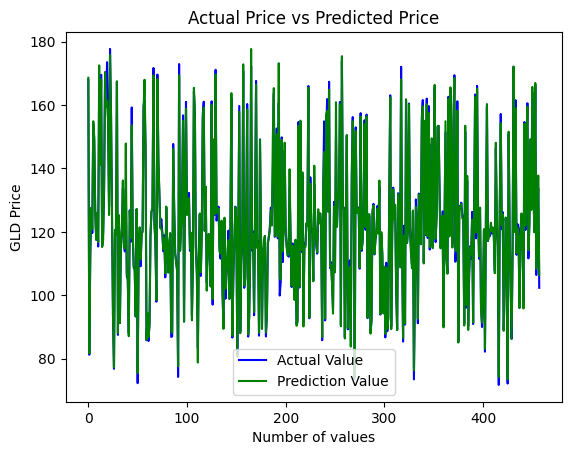

In [50]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='green', label='Prediction Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()